In [3]:
pwd

'/home/dave/dev/PB/Photogrammetry_20181119/Photogrammetry/mirrorfithmc'

In [1]:
cd "/Users/daveboettger/Google Drive/PbGeneral/Photogrammetry/mirrorfithmc"

/Users/daveboettger/Google Drive/PbGeneral/Photogrammetry/mirrorfithmc


In [9]:
import sys
sys.path.append('.')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymc3 as pm
import test_cloud_align as tc

In [10]:
model=tc.load_multi_model_moons()

Align_DS2_to_DS1 fitmap is {'tx': True, 'ty': True, 'tz': True, 'rx': True, 'ry': True, 'rz': True, 's': True, 'rescale_errors': False}
TVALS are: {'tx': Align_DS2_to_DS1_tx, 'ty': Align_DS2_to_DS1_ty, 'tz': Align_DS2_to_DS1_tz, 'rx': Align_DS2_to_DS1_rx, 'ry': Align_DS2_to_DS1_ry, 'rz': Align_DS2_to_DS1_rz, 's': Align_DS2_to_DS1_s}
Align_DS3_to_DS1 fitmap is {'tx': True, 'ty': True, 'tz': True, 'rx': True, 'ry': True, 'rz': True, 's': True, 'rescale_errors': False}
TVALS are: {'tx': Align_DS3_to_DS1_tx, 'ty': Align_DS3_to_DS1_ty, 'tz': Align_DS3_to_DS1_tz, 'rx': Align_DS3_to_DS1_rx, 'ry': Align_DS3_to_DS1_ry, 'rz': Align_DS3_to_DS1_rz, 's': Align_DS3_to_DS1_s}


In [11]:
trace = tc.sample(model)

Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...
Average Loss = -4,793.3:  27%|██▋       | 54193/200000 [01:59<05:21, 453.48it/s]  
Convergence achieved at 54200
Interrupted at 54,199 [27%]: Average Loss = 3.5024e+08
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Align_DS3_to_DS1_s, Align_DS3_to_DS1_rz, Align_DS3_to_DS1_ry, Align_DS3_to_DS1_rx, Align_DS3_to_DS1_tz, Align_DS3_to_DS1_ty, Align_DS3_to_DS1_tx, Align_DS2_to_DS1_s, Align_DS2_to_DS1_rz, Align_DS2_to_DS1_ry, Align_DS2_to_DS1_rx, Align_DS2_to_DS1_tz, Align_DS2_to_DS1_ty, Align_DS2_to_DS1_tx]
Sampling 4 chains: 100%|██████████| 30000/30000 [04:07<00:00, 121.06draws/s]


In [3]:
with model as model:
    trace=pm.load_trace('moons_alignments/multigaussianalign_xyzerror/')

In [12]:
model.vars,trace.varnames,model.test_point

([Align_DS2_to_DS1_tx,
  Align_DS2_to_DS1_ty,
  Align_DS2_to_DS1_tz,
  Align_DS2_to_DS1_rx,
  Align_DS2_to_DS1_ry,
  Align_DS2_to_DS1_rz,
  Align_DS2_to_DS1_s,
  Align_DS3_to_DS1_tx,
  Align_DS3_to_DS1_ty,
  Align_DS3_to_DS1_tz,
  Align_DS3_to_DS1_rx,
  Align_DS3_to_DS1_ry,
  Align_DS3_to_DS1_rz,
  Align_DS3_to_DS1_s],
 ['Align_DS2_to_DS1_tx',
  'Align_DS2_to_DS1_ty',
  'Align_DS2_to_DS1_tz',
  'Align_DS2_to_DS1_rx',
  'Align_DS2_to_DS1_ry',
  'Align_DS2_to_DS1_rz',
  'Align_DS2_to_DS1_s',
  'Align_DS3_to_DS1_tx',
  'Align_DS3_to_DS1_ty',
  'Align_DS3_to_DS1_tz',
  'Align_DS3_to_DS1_rx',
  'Align_DS3_to_DS1_ry',
  'Align_DS3_to_DS1_rz',
  'Align_DS3_to_DS1_s'],
 {'Align_DS2_to_DS1_tx': array(-16.88383528),
  'Align_DS2_to_DS1_ty': array(3.97203442),
  'Align_DS2_to_DS1_tz': array(-40.44548248),
  'Align_DS2_to_DS1_rx': array(0.),
  'Align_DS2_to_DS1_ry': array(0.),
  'Align_DS2_to_DS1_rz': array(0.),
  'Align_DS2_to_DS1_s': array(100.),
  'Align_DS3_to_DS1_tx': array(-11.96011063),
  '

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efbfcb51898>,
      dtype=object)

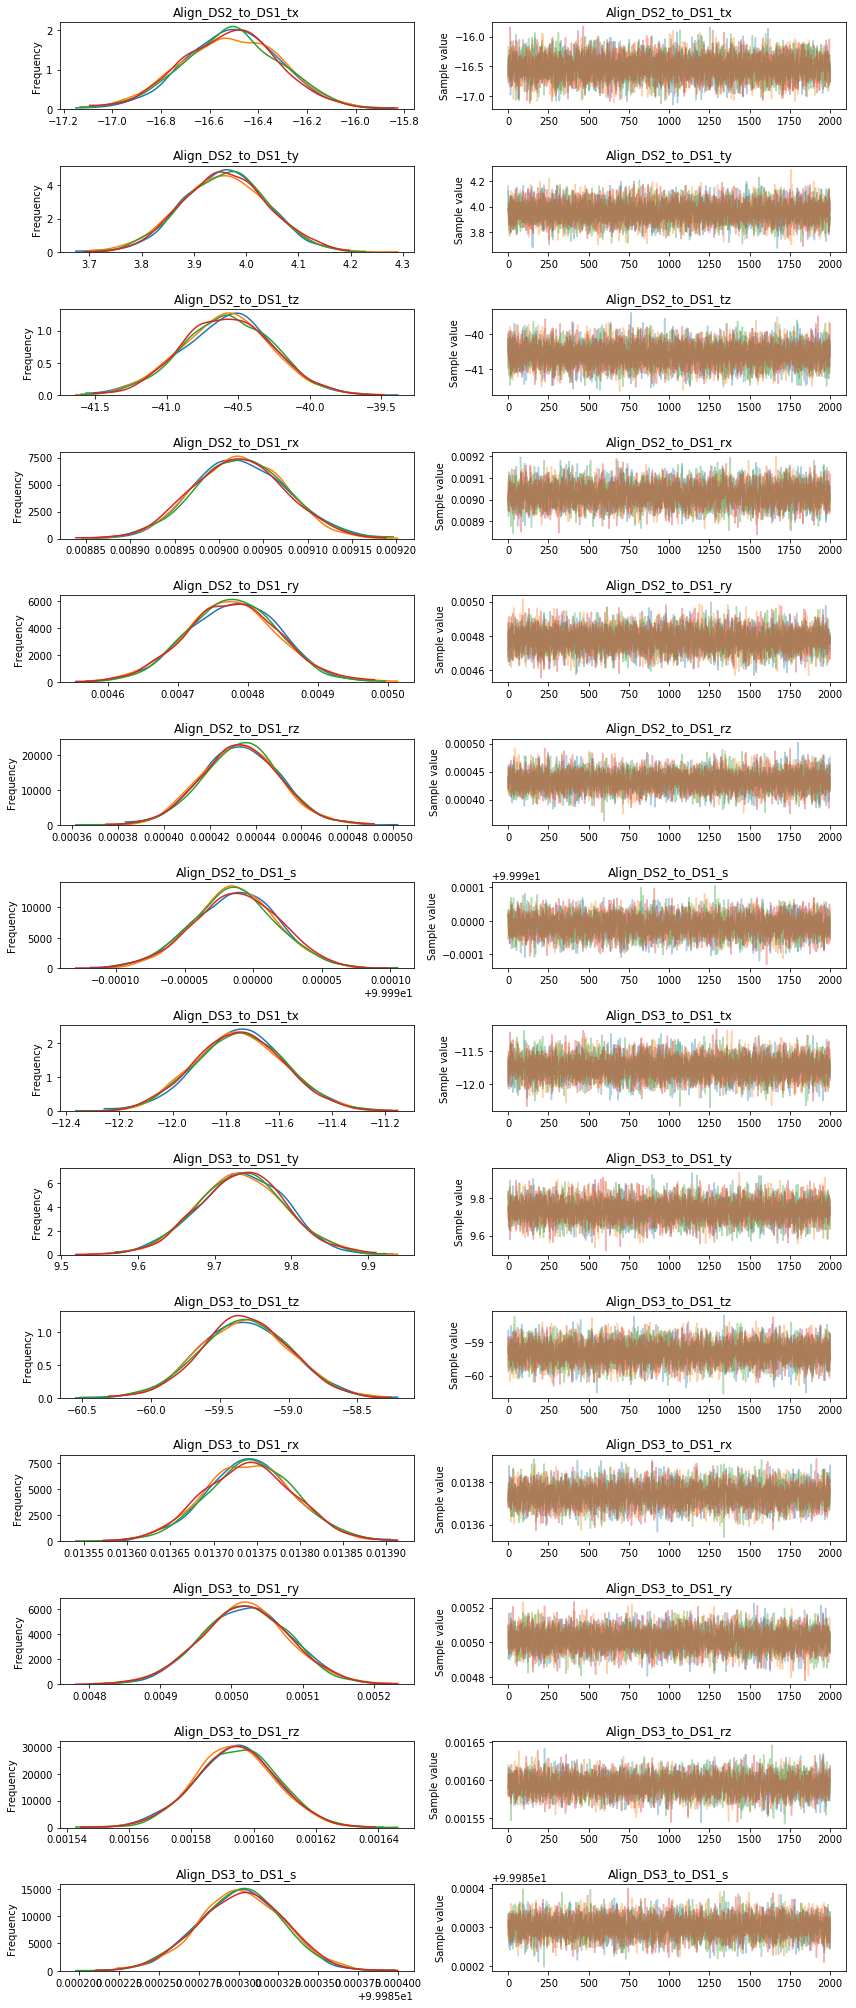

In [18]:
pm.traceplot(trace)

In [5]:
errorscale1=trace.get_values('MultiAlign_error_scale_DS1')

In [6]:
np.mean(np.abs(errorscale1),axis=0)

array([2.33999059, 4.81382334, 0.80577116])

In [7]:
errorscale2=trace.get_values('MultiAlign_error_scale_DS2')

In [8]:
np.mean(np.abs(errorscale2),axis=0)

array([0.59611901, 1.90050301, 0.48541609])

In [9]:
errorscale3=trace.get_values('MultiAlign_error_scale_DS3')

In [10]:
np.mean(np.abs(errorscale3),axis=0)

array([2.6255734 , 7.05143474, 0.92719312])

In [11]:
xlevels=tc.mf.util.find_credible_levels(x=errorscale2[:,0],y=errorscale3[:,0])
ylevels=tc.mf.util.find_credible_levels(errorscale2[:,1],errorscale3[:,1])
zlevels=tc.mf.util.find_credible_levels(errorscale2[:,2],errorscale3[:,2])
xlevels, ylevels, zlevels

([0.0,
  0.7583743428660441,
  2.275123028598133,
  12.133989485860521,
  44.74408622911314],
 [0.0,
  0.40580402223459927,
  0.8116080444711362,
  4.463844244580594,
  17.043768933857045],
 [0.0,
  6.637344271984211,
  13.274688543969482,
  73.01078699183059,
  298.6804922392906])

Text(0, 0.5, 'Errorscale3')

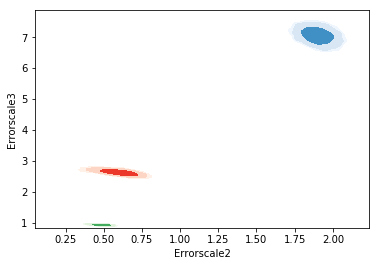

In [12]:
ax = sns.kdeplot(errorscale2[:,0], errorscale3[:,0],cmap="Reds",shade=True, shade_lowest=False, levels=xlevels)
ax = sns.kdeplot(errorscale2[:,1], errorscale3[:,1],cmap="Blues",shade=True, shade_lowest=False, levels=ylevels)
ax = sns.kdeplot(errorscale2[:,2], errorscale3[:,2],cmap="Greens",shade=True, shade_lowest=False, levels=zlevels)
ax.set_xlabel('Errorscale2')
ax.set_ylabel('Errorscale3')

In [7]:
diffs,errors = model.calc_diff(trace=trace)

In [8]:
diffs.keys()

dict_keys(['DS1-DS2', 'DS1-DS3', 'DS2-DS3'])

In [9]:
sigerror = {}
for k in diffs:
    sigerror[k] = np.mean(diffs[k]/errors[k], axis=0)


In [16]:
np.shape(sigerror['DS1-DS3'])

(3, 1627)

In [10]:
for k in sigerror:
    print(k,np.sum(np.abs(sigerror[k].flat)<1)/len(sigerror[k].flat))

DS1-DS2 0.548658061872567
DS1-DS3 0.3859864781807007
DS2-DS3 0.5421020282728949


In [11]:
for k in sigerror:
    print(k,np.sum(np.abs(sigerror[k].flat)<2)/len(sigerror[k].flat))

DS1-DS2 0.8113091579594346
DS1-DS3 0.6107355050194633
DS2-DS3 0.792460561360377


(array([2.000e+00, 5.000e+00, 1.100e+01, 2.700e+01, 5.900e+01, 1.070e+02,
        2.220e+02, 5.800e+02, 1.344e+03, 1.434e+03, 6.160e+02, 2.470e+02,
        1.150e+02, 5.700e+01, 3.700e+01, 6.000e+00, 9.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-9.81188986, -8.72727897, -7.64266809, -6.5580572 , -5.47344632,
        -4.38883543, -3.30422455, -2.21961366, -1.13500278, -0.05039189,
         1.03421899,  2.11882988,  3.20344076,  4.28805165,  5.37266253,
         6.45727341,  7.5418843 ,  8.62649518,  9.71110607, 10.79571695,
        11.88032784, 12.96493872, 14.04954961, 15.13416049, 16.21877138,
        17.30338226, 18.38799315, 19.47260403, 20.55721492, 21.6418258 ,
        22.72643669]),
 <a list of 30 Patch objects>)

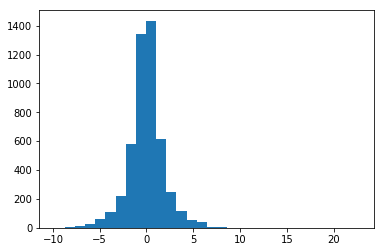

In [12]:
plt.hist(sigerror['DS2-DS3'].flat,30)

In [25]:
diffdists = {}
for k in diffs:
    diffdists[k] = np.linalg.norm(diffs[k],axis=1)

In [27]:
np.shape(diffdists['DS1-DS2'])

(8000, 1627)

In [29]:
meandiffdists = {}
for k in diffdists:
    meandiffdists[k] = np.mean(diffdists[k],axis=0)

In [7]:
import pickle

In [25]:
with open('moons_sigerror.pkl', 'wb') as f:
    pickle.dump(sigerror, f)

In [22]:
sigerror

{'DS1-DS2': array([[-0.73764359, -5.9147979 ,  0.24813591, ..., -0.30800187,
          0.07342363,  2.64690022],
        [-1.71526477, -2.40652946,  3.93189323, ..., -5.10869732,
          2.08537523,  2.20234937],
        [ 0.2126905 ,  0.39062684, -1.01838526, ..., -0.78148552,
          0.17139263,  0.99818452]]),
 'DS1-DS3': array([[ -2.93356567,  -7.50031414,  -0.0643211 , ...,   0.20264296,
           2.98832529,   4.24672301],
        [ -4.41982044, -16.10298996,  17.18786877, ...,   0.25558237,
          11.48398094,   6.839884  ],
        [ -0.8818263 ,  -0.13166042,  -2.15676495, ...,  -0.42531189,
          -0.0428383 ,   1.40967167]]),
 'DS2-DS3': array([[-1.56342129,  0.47118526, -0.32763097, ...,  0.4743909 ,
          2.39627144,  0.52162031],
        [-1.60174888, -5.40660679,  4.39240926, ...,  5.26782452,
          4.88194571,  2.71770874],
        [-1.13371253, -0.52152375, -1.27457162, ...,  0.35545551,
         -0.24917911,  0.48035207]])}

In [12]:
diffmeans = {}
for k in diffs:
    diffmeans[k] = np.mean(diffs[k],axis=0)

In [17]:
errormeans = {}
for k in errors:
    errormeans[k] = np.mean(errors[k],axis=0)

In [13]:
diffmeans.keys()

dict_keys(['DS1-DS2', 'DS1-DS3', 'DS2-DS3'])

In [19]:
errormeans['DS1-DS2'][0]

array([0.01079115, 0.00988125, 0.01156036, ..., 0.0110113 , 0.01106799,
       0.01058153])

In [20]:
diffmeans['DS1-DS2'][0]

array([ 0.01065238, -0.03602663,  0.01268776, ...,  0.00999925,
       -0.0007067 , -0.00486737])

In [23]:
with open('moons_diffs_errors.pkl', 'wb') as f:
    pickle.dump({'errors':errormeans, 'diffs':diffmeans},f)

In [25]:
model.ref

AttributeError: 'AlignManyDatasets' object has no attribute 'ref'

In [3]:
model.reference.write_data_file('moons_ref.txt')

In [10]:
tc.mf.mirrorfit

AttributeError: module 'mirrorfithmc' has no attribute 'mirrorfit'

In [4]:
refarray=model.reference.to_array()

In [8]:
with open('ds1refarray_positions.pkl', 'wb') as f:
    pickle.dump(refarray,f)

In [44]:
ds2to1trans, error = model.alignments[0].mean_transform(trace)
ds3to1trans, error = model.alignments[1].mean_transform(trace)

In [47]:
print(model.alignments[0].name)
print(model.alignments[1].name)

Align_DS2_to_DS1
Align_DS3_to_DS1


In [35]:
ds2alignedtensor = ds2to1trans*model.datasets[0].to_tensors()
ds2aligned = tc.mf.DatasetArrays(pos=ds2alignedtensor.pos.eval().T, err=ds2alignedtensor.err.eval().T, serr=ds2alignedtensor.serr.eval().T)
ds2aligned

DatasetArrays(pos=array([[ 136.48079217, -277.14823145,  128.03356042],
       [-529.85197227,  501.08013594, -162.27513778],
       [-322.88536743,   61.82397657,  -20.65175919],
       ...,
       [ 155.11642645, -512.46698926,  190.6470744 ],
       [-427.06751428,  -83.21741939,    2.41437456],
       [ -63.89777109,  102.90256042,    3.84276215]]), err=array([[0.00800003, 0.00309813, 0.01029879],
       [0.00909993, 0.00389802, 0.0104988 ],
       [0.00799995, 0.00339826, 0.00929894],
       ...,
       [0.00810012, 0.00379787, 0.01149877],
       [0.00799995, 0.00339826, 0.00929894],
       [0.00819995, 0.00429812, 0.00959903]]), serr=array([[0.00800003, 0.00309813, 0.01029879],
       [0.00909993, 0.00389802, 0.0104988 ],
       [0.00799995, 0.00339826, 0.00929894],
       ...,
       [0.00810012, 0.00379787, 0.01149877],
       [0.00799995, 0.00339826, 0.00929894],
       [0.00819995, 0.00429812, 0.00959903]]))

In [36]:
ds2aligned.pos.shape

(1627, 3)

In [39]:
ds2alignedds = model.datasets[0].remake_from_arrays(ds2aligned)

In [40]:
ds2alignedds.write_data_file('moons_ds2_mcmc_triple_mean_aligned.txt')

In [41]:
ds3alignedtensor = ds3to1trans*model.datasets[1].to_tensors()
ds3aligned = tc.mf.DatasetArrays(pos=ds3alignedtensor.pos.eval().T, err=ds3alignedtensor.err.eval().T, serr=ds3alignedtensor.serr.eval().T)
ds3aligned

DatasetArrays(pos=array([[ 136.48791656, -277.14765531,  128.01991689],
       [-529.84940924,  501.06246621, -162.26898093],
       [-322.88390609,   61.81750818,  -20.63508725],
       ...,
       [ 155.11451187, -512.46017354,  190.64903718],
       [-427.07223241,  -83.23080467,    2.44175617],
       [ -63.90197772,  102.88330493,    3.82888018]]), err=array([[0.00520034, 0.00139682, 0.01299797],
       [0.00540022, 0.00179698, 0.01209818],
       [0.00460021, 0.00149737, 0.0105984 ],
       ...,
       [0.00520034, 0.00139682, 0.01299797],
       [0.00460021, 0.00149737, 0.0105984 ],
       [0.00460021, 0.00149737, 0.0105984 ]]), serr=array([[0.00520034, 0.00139682, 0.01299797],
       [0.00540022, 0.00179698, 0.01209818],
       [0.00460021, 0.00149737, 0.0105984 ],
       ...,
       [0.00520034, 0.00139682, 0.01299797],
       [0.00460021, 0.00149737, 0.0105984 ],
       [0.00460021, 0.00149737, 0.0105984 ]]))

In [51]:
ds3alignedds = model.datasets[1].remake_from_arrays(ds3aligned)

In [52]:
ds3alignedds.write_data_file('moons_ds3_mcmc_triple_mean_aligned.txt')